# 전세계 코로나 백신접종 분석

In [36]:
from dateutil.parser import parse
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import itertools
import statsmodels.tsa.api as tsa

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [37]:
df = pd.read_excel('owid-covid-data.xlsx')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138693,ZWE,Africa,Zimbabwe,2021-12-04,138523.0,1082.0,669.571,4709.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
138694,ZWE,Africa,Zimbabwe,2021-12-05,139046.0,523.0,727.857,4710.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
138695,ZWE,Africa,Zimbabwe,2021-12-06,139046.0,0.0,688.571,4710.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
138696,ZWE,Africa,Zimbabwe,2021-12-07,141601.0,2555.0,996.571,4713.0,3.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [38]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [39]:
df.drop(columns=['iso_code', 'continent', 'new_cases_smoothed', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index',
       'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million'], inplace=True)
df

,location,date,total_cases,new_cases,total_deaths,new_deaths,people_fully_vaccinated,total_boosters
0,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN
1,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
138693,Zimbabwe,2021-12-04,138523.0,1082.0,4709.0,1.0,2876054.0,NaN
138694,Zimbabwe,2021-12-05,139046.0,523.0,4710.0,1.0,2884043.0,NaN
138695,Zimbabwe,2021-12-06,139046.0,0.0,4710.0,0.0,2892364.0,NaN
138696,Zimbabwe,2021-12-07,141601.0,2555.0,4713.0,3.0,2910951.0,NaN


In [40]:
df.columns

Index(['location', 'date', 'total_cases', 'new_cases', 'total_deaths',
       'new_deaths', 'people_fully_vaccinated', 'total_boosters'],
      dtype='object')

In [41]:
df1 = df.groupby('date')[['total_cases', 'new_cases', 'total_deaths',
       'new_deaths', 'people_fully_vaccinated', 'total_boosters']].sum().reset_index()
df1

,date,total_cases,new_cases,total_deaths,new_deaths,people_fully_vaccinated,total_boosters
0,2020-01-01,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00
1,2020-01-02,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00
2,2020-01-03,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00
3,2020-01-04,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00
4,2020-01-05,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...
703,2021-12-04,1.109640e+09,2257147.0,21849654.0,22802.0,1.256831e+10,1.154946e+09
704,2021-12-05,1.111507e+09,1867545.0,21879083.0,29429.0,1.281663e+10,1.164269e+09
705,2021-12-06,1.114106e+09,2598423.0,21909030.0,29947.0,1.286877e+10,1.185693e+09
706,2021-12-07,1.117197e+09,3091289.0,21944571.0,35541.0,1.239750e+10,1.143363e+09


In [42]:
df2 = df1.drop(index=707)
df2

,date,total_cases,new_cases,total_deaths,new_deaths,people_fully_vaccinated,total_boosters
0,2020-01-01,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00
1,2020-01-02,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00
2,2020-01-03,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00
3,2020-01-04,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00
4,2020-01-05,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...
702,2021-12-03,1.107383e+09,3172684.0,21826852.0,35865.0,1.363318e+10,1.231291e+09
703,2021-12-04,1.109640e+09,2257147.0,21849654.0,22802.0,1.256831e+10,1.154946e+09
704,2021-12-05,1.111507e+09,1867545.0,21879083.0,29429.0,1.281663e+10,1.164269e+09
705,2021-12-06,1.114106e+09,2598423.0,21909030.0,29947.0,1.286877e+10,1.185693e+09


In [43]:
filt = (df2['people_fully_vaccinated'] > 0)
df2[filt]

,date,total_cases,new_cases,total_deaths,new_deaths,people_fully_vaccinated,total_boosters
347,2020-12-13,3.033517e+08,2223795.0,6998075.0,33215.0,1.617200e+04,0.000000e+00
348,2020-12-14,3.055628e+08,2211165.0,7037349.0,39274.0,1.656400e+04,0.000000e+00
349,2020-12-15,3.083187e+08,2755869.0,7097080.0,59731.0,1.742000e+04,0.000000e+00
350,2020-12-16,3.114116e+08,3092909.0,7156685.0,59605.0,1.901600e+04,0.000000e+00
351,2020-12-17,3.145433e+08,3131731.0,7214064.0,57379.0,2.134800e+04,0.000000e+00
...,...,...,...,...,...,...,...
702,2021-12-03,1.107383e+09,3172684.0,21826852.0,35865.0,1.363318e+10,1.231291e+09
703,2021-12-04,1.109640e+09,2257147.0,21849654.0,22802.0,1.256831e+10,1.154946e+09
704,2021-12-05,1.111507e+09,1867545.0,21879083.0,29429.0,1.281663e+10,1.164269e+09
705,2021-12-06,1.114106e+09,2598423.0,21909030.0,29947.0,1.286877e+10,1.185693e+09


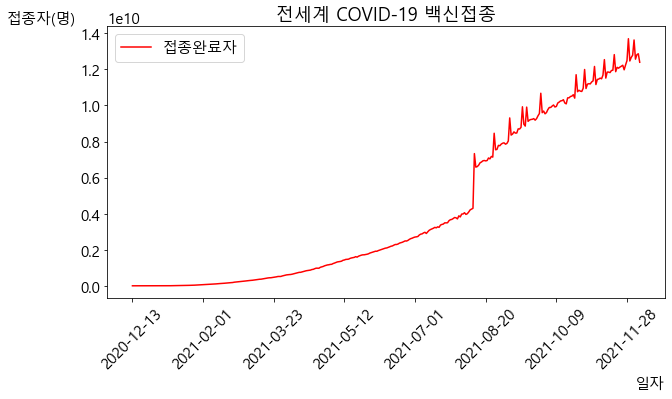

In [44]:
df2[filt].plot('date', 'people_fully_vaccinated', title='전세계 COVID-19 백신접종', color='r', figsize=(10, 5), label='접종완료자')
plt.legend(loc='upper left')
plt.xlabel('일자', loc = 'right')
plt.xticks(rotation=45)
plt.ylabel('접종자(명)', rotation=0, loc='top');

In [45]:
df2['date'] = pd.to_datetime(df2['date'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 707 entries, 0 to 706
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     707 non-null    datetime64[ns]
 1   total_cases              707 non-null    float64       
 2   new_cases                707 non-null    float64       
 3   total_deaths             707 non-null    float64       
 4   new_deaths               707 non-null    float64       
 5   people_fully_vaccinated  707 non-null    float64       
 6   total_boosters           707 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 44.2 KB


In [46]:
df2_time = pd.pivot_table(data = df2, index = 'date', values = 'people_fully_vaccinated', aggfunc = 'sum')
df2_time.head()

,people_fully_vaccinated
date,
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
2020-01-05,0.0


In [47]:
y = df2_time['people_fully_vaccinated'].resample('1D').mean()

In [48]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
plt.show()

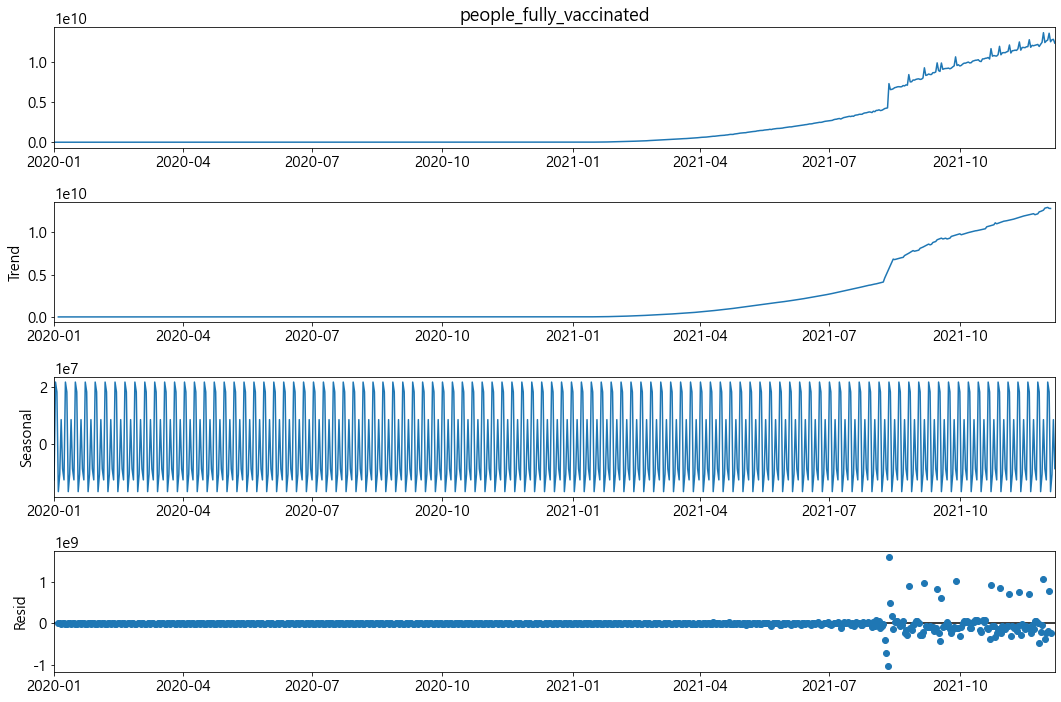

In [49]:
ms = tsa.seasonal_decompose(y, model='additive')
fig = ms.plot();

In [50]:
p = d = q =range (0, 2)
pdq = list(itertools.product(p, d, q))
season_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [51]:
season_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [52]:
p_list = []
p_season_list = []
results_AIC_list = []

In [53]:
for param in pdq:
    for p_season in season_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y,order = param,
                                        seasonal_order = p_season,
                                        enforce_stationarity = False,
                                        enforce_inveribility = False)
            results = mod.fit()
            p_list.append(param)
            p_season_list.append(p_season)
            results_AIC_list.append(results.aic)
        except:
            continue

C:\Users\82106\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [54]:
ARIMA_list = pd.DataFrame({'Parameter':p_list,'Seasonal':p_season_list,'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

In [55]:
ARIMA_list.sort_values(by='AIC')

,Parameter,Seasonal,AIC
59,"(1, 1, 1)","(0, 1, 1, 12)",28057.351476
27,"(0, 1, 1)","(0, 1, 1, 12)",28058.807174
63,"(1, 1, 1)","(1, 1, 1, 12)",28059.086774
31,"(0, 1, 1)","(1, 1, 1, 12)",28060.688914
43,"(1, 0, 1)","(0, 1, 1, 12)",28093.711508
...,...,...,...
9,"(0, 0, 1)","(0, 0, 1, 12)",32083.138588
12,"(0, 0, 1)","(1, 0, 0, 12)",32120.873123
1,"(0, 0, 0)","(0, 0, 1, 12)",32291.051001
8,"(0, 0, 1)","(0, 0, 0, 12)",32767.225520


In [56]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:            people_fully_vaccinated   No. Observations:                  707
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -14024.543
Date:                            Sun, 12 Dec 2021   AIC                          28059.087
Time:                                    21:09:01   BIC                          28081.697
Sample:                                01-01-2020   HQIC                         28067.839
                                     - 12-07-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1167      0.075     -1.559      0.119      -0.263       0.030
ma.L1         -0.4575      0.072   

C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3108: RuntimeWarning: divide by zero encountered in double_scalars
  test_statistic = np.sum(numer_resid) / np.sum(denom_resid)


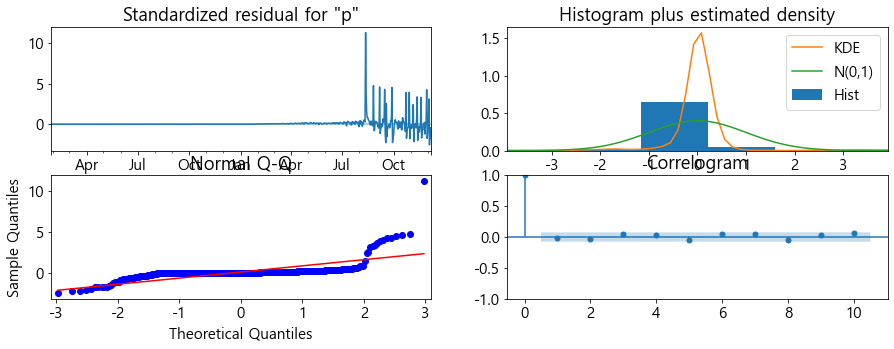

In [57]:
results.plot_diagnostics(figsize=(15, 5));

In [58]:
results.get_prediction();

In [59]:
y.head()

date
2020-01-01    0.0
2020-01-02    0.0
2020-01-03    0.0
2020-01-04    0.0
2020-01-05    0.0
Freq: D, Name: people_fully_vaccinated, dtype: float64

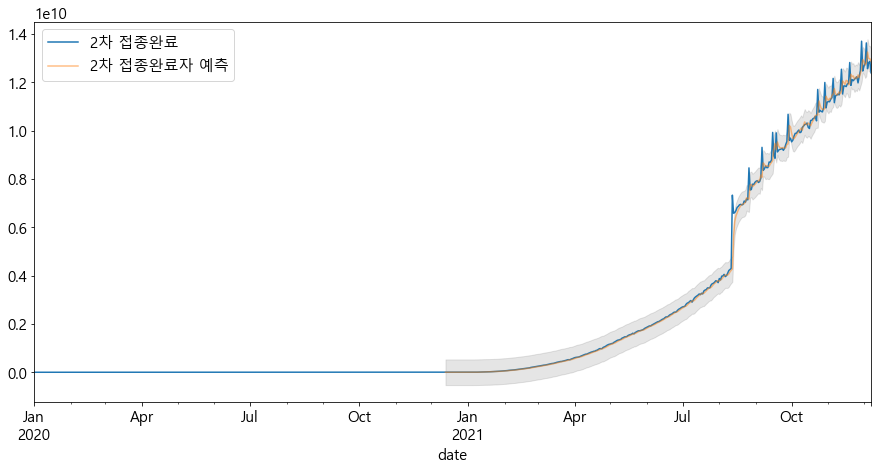

In [62]:
prediction = results.get_prediction(start=pd.to_datetime('2020-12-13'), dynamic=False)
prediction_c = prediction.conf_int()

ax = y.plot(label='2차 접종완료')
prediction.predicted_mean.plot(ax=ax, label='2차 접종완료자 예측', alpha=.5, figsize=(15, 7))
ax.fill_between(prediction_c.index,prediction_c.iloc[:, 0],prediction_c.iloc[:, 1], color='k', alpha=.1)

plt.legend();

In [63]:
prediction = results.get_prediction(start=pd.to_datetime('2020-12-13'), dynamic=False)
pd.DataFrame(prediction.predicted_mean).reset_index();

In [64]:
y_forecast = pred.predicted_mean
y_truth = y['2020-01-01':]
mse = ((y_forecast - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

MSE 4.060541486497683e+16


In [65]:
prediction_u = results.get_forecast(steps=100)

In [66]:
prediction_u.predicted_mean

2021-12-08    1.276162e+10
2021-12-09    1.277099e+10
2021-12-10    1.295320e+10
2021-12-11    1.312629e+10
2021-12-12    1.296060e+10
                  ...     
2022-03-13    1.688155e+10
2022-03-14    1.699195e+10
2022-03-15    1.703652e+10
2022-03-16    1.721731e+10
2022-03-17    1.742164e+10
Freq: D, Name: predicted_mean, Length: 100, dtype: float64

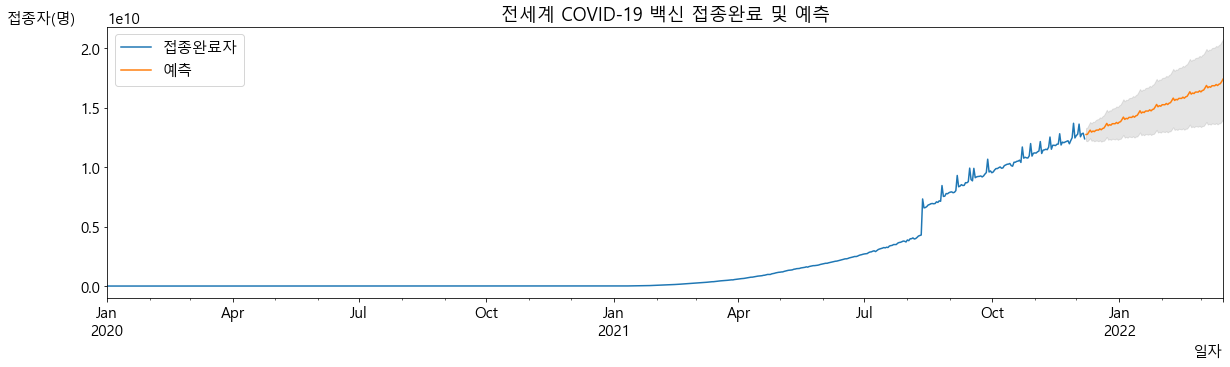

In [69]:
prediction_u = results.get_forecast(steps=100)
prediction_c = prediction_u.conf_int()
ax = y.plot(label='접종완료자', figsize=(20, 5))
prediction_u.predicted_mean.plot(ax=ax, label='예측')
ax.fill_between(prediction_c.index,
                 prediction_c.iloc[:, 0],
                 prediction_c.iloc[:, 1], color='grey', alpha=.2)

plt.title('전세계 COVID-19 백신 접종완료 및 예측')
plt.legend(loc='upper left')
plt.xlabel('일자', loc = 'right')
plt.ylabel('접종자(명)', rotation=0, loc='top')

plt.savefig('전세계 백신접종 및 예측.png', dpi=100);